<a href="https://colab.research.google.com/github/kerolos98/machine-learning/blob/master/COVID19_Global_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [0]:
# Path of the file to read
TrainCov_filepath = "/content/train.csv"

# Read the file into a variable spotify_data
TrainCov_data = pd.read_csv(TrainCov_filepath,dtype={'Country/Region':str} )

In [3]:

print(TrainCov_data.columns)

Index(['Id', 'Province/State', 'Country/Region', 'Lat', 'Long', 'Date',
       'ConfirmedCases', 'Fatalities'],
      dtype='object')


In [0]:
TrainCov_data.drop(['Id'], axis=1, inplace=True)


In [5]:
print(TrainCov_data.columns)

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date',
       'ConfirmedCases', 'Fatalities'],
      dtype='object')


In [6]:
TrainCov_data.describe()


,Lat,Long,ConfirmedCases,Fatalities
count,16188.000000,16188.000000,16188.000000,16188.000000
mean,26.287693,4.766191,249.483012,8.237583
std,22.935159,79.923496,3168.929157,132.127695
min,-41.454500,-157.498300,0.000000,0.000000
25%,13.145425,-71.516375,0.000000,0.000000
50%,32.985550,9.775000,0.000000,0.000000
75%,42.501575,64.688975,5.000000,0.000000
max,71.706900,174.886000,67800.000000,3122.000000


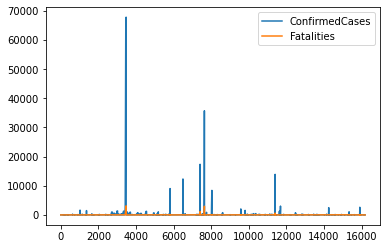

In [7]:
sns.lineplot(data=TrainCov_data['ConfirmedCases'], label="ConfirmedCases")
sns.lineplot(data=TrainCov_data['Fatalities'], label="Fatalities")

In [8]:
TrainCov_data.head()

,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [0]:
sorted_df = TrainCov_data.groupby("Country/Region").agg("sum").sort_values(by=['Fatalities'], ascending=False).reset_index()

In [10]:
sorted_df.head()

,Country/Region,Lat,Long,ConfirmedCases,Fatalities
0,China,61750.1919,210011.9229,3124622.0,103112.0
1,Italy,2451.0000,684.0000,238049.0,16221.0
2,Iran,1824.0000,3021.0000,150833.0,7166.0
3,Spain,2280.0000,-228.0000,64917.0,2325.0
4,"Korea, South",2052.0000,7296.0000,137889.0,1048.0


In [0]:
death=sorted_df['Fatalities']/sorted_df['ConfirmedCases']

In [0]:
sorted_df['DeathRatio'] = death
covid_cnt_by_country = sorted_df[["Country/Region", "ConfirmedCases", "Fatalities","DeathRatio"]]

In [13]:
sorted_df.head(20)

,Country/Region,Lat,Long,ConfirmedCases,Fatalities,DeathRatio
0,China,61750.1919,210011.9229,3124622.0,103112.0,0.033000
1,Italy,2451.0000,684.0000,238049.0,16221.0,0.068141
2,Iran,1824.0000,3021.0000,150833.0,7166.0,0.047509
3,Spain,2280.0000,-228.0000,64917.0,2325.0,0.035815
4,"Korea, South",2052.0000,7296.0000,137889.0,1048.0,0.007600
5,France,2892.1800,652.1541,48132.0,930.0,0.019322
6,US,124872.8013,-278774.7849,31858.0,579.0,0.018174
7,Japan,2052.0000,7866.0000,12584.0,275.0,0.021853
8,United Kingdom,10085.9790,-8811.9720,12086.0,268.0,0.022174
9,Netherlands,4378.7856,-7622.8665,10548.0,189.0,0.017918


In [14]:
sorted_df.size

978

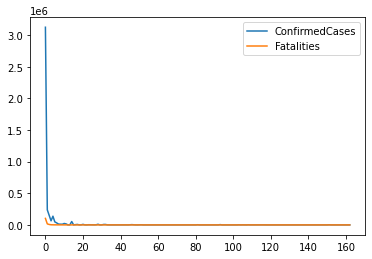

In [15]:
sns.lineplot(data=sorted_df['ConfirmedCases'], label="ConfirmedCases")
sns.lineplot(data=sorted_df['Fatalities'], label="Fatalities")

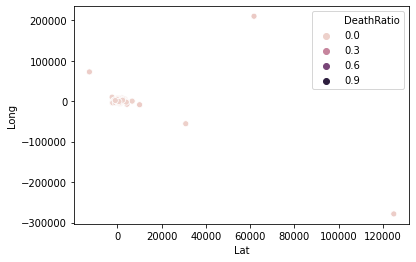

In [16]:
sns.scatterplot(x=sorted_df['Lat'], y=sorted_df['Long'],hue=sorted_df['DeathRatio'])

In [17]:
!pip install geopandas

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


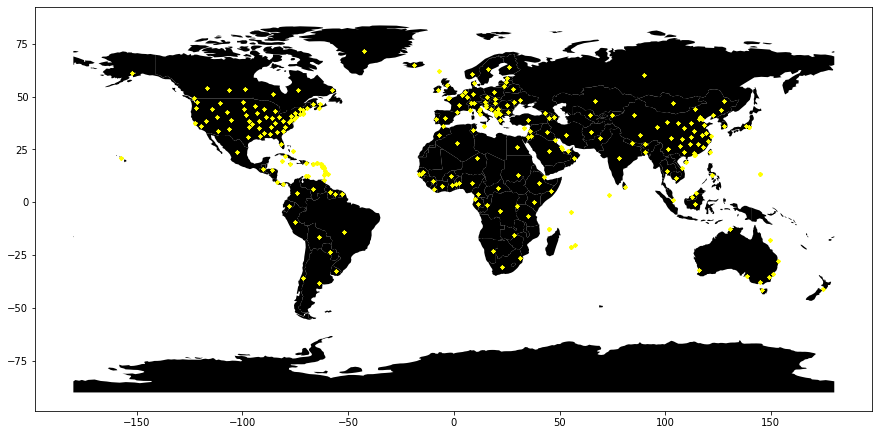

In [18]:
from shapely.geometry import Point, Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(TrainCov_data['Long'], TrainCov_data['Lat'])]
geo_df = gpd.GeoDataFrame(TrainCov_data, crs = crs, geometry = geometry)
fig, ax = plt.subplots(figsize = (15, 10))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax = ax, color = "black")
geo_df.plot(ax = ax, markersize = 5, color = "yellow", marker = "o")

Text(0.5, 1.0, 'Death Ratio by Countries')

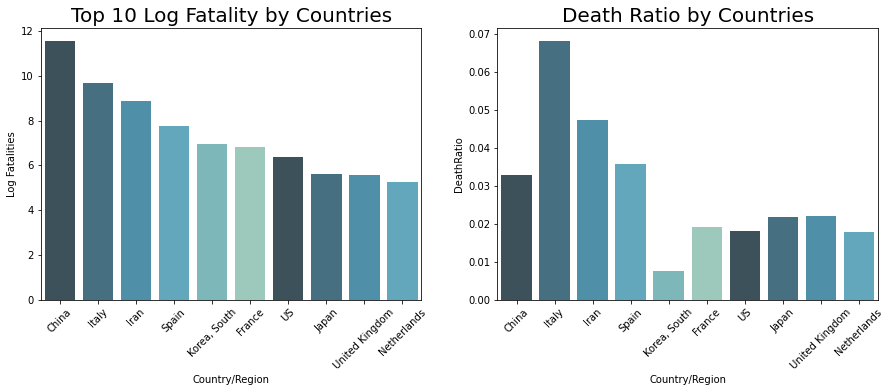

In [19]:
import numpy as np
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
fig1 = sns.barplot(sorted_df["Country/Region"][:10], np.log(sorted_df["Fatalities"][:10]), 
                   ax = ax[0], palette=sns.color_palette("GnBu_d"))
fig2 = sns.barplot(sorted_df["Country/Region"][:10], sorted_df["DeathRatio"][:10], 
                   ax = ax[1], palette=sns.color_palette("GnBu_d"))
fig1.set_xticklabels(fig1.get_xticklabels(), rotation=45)
fig2.set_xticklabels(fig2.get_xticklabels(), rotation=45)
fig1.set(ylabel = "Log Fatalities")
fig1.set_title("Top 10 Log Fatality by Countries", size = 20)
fig2.set_title("Death Ratio by Countries", size = 20)


In [20]:
from scipy.stats import pearsonr,spearmanr
df1 = sorted_df.dropna()

corr, _ = pearsonr(df1["DeathRatio"],df1[ 'ConfirmedCases'])

print('Pearsons correlation: %.3f' % corr)
cor2r, _ = spearmanr(df1["DeathRatio"],df1[ 'ConfirmedCases'])
print('Spearmans correlation: %.3f' % cor2r)

Pearsons correlation: 0.022
Spearmans correlation: 0.522


In [21]:

corr, _ = pearsonr(df1["DeathRatio"],df1[ 'Fatalities'])

print('Pearsons correlation: %.3f' % corr)
cor2r, _ = spearmanr(df1["DeathRatio"],df1[ 'Fatalities'])
print('Spearmans correlation: %.3f' % cor2r)

Pearsons correlation: 0.029
Spearmans correlation: 0.945


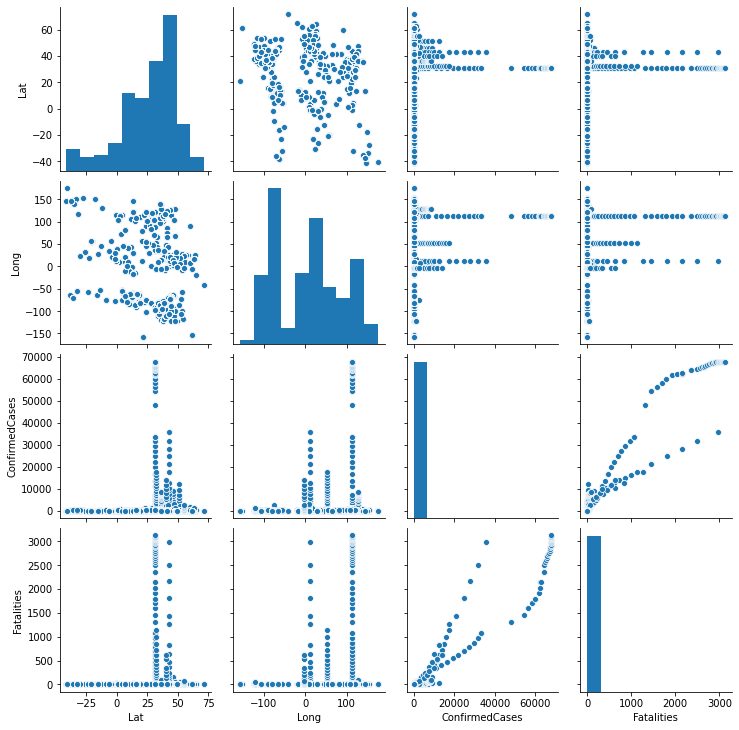

In [22]:
sns.pairplot(TrainCov_data)

In [23]:
TrainCov_data.dtypes

Province/State      object
Country/Region      object
Lat                float64
Long               float64
Date                object
ConfirmedCases     float64
Fatalities         float64
geometry          geometry
dtype: object

In [0]:
TrainCov_data['Date']=pd.to_datetime(TrainCov_data['Date'])

In [0]:
TrainCov_data=TrainCov_data.set_index('Date')

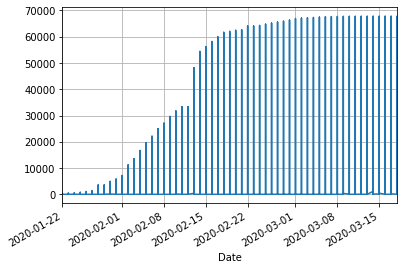

In [26]:
TrainCov_data['ConfirmedCases'].plot(grid=True)

In [0]:
y = TrainCov_data.resample('MS').mean()


In [28]:
y['2020':]

,Lat,Long,ConfirmedCases,Fatalities
Date,,,,
2020-01-01,26.287693,4.766191,13.554577,0.313028
2020-02-01,26.287693,4.766191,202.948397,5.694148
2020-03-01,26.287693,4.766191,455.526800,16.737872


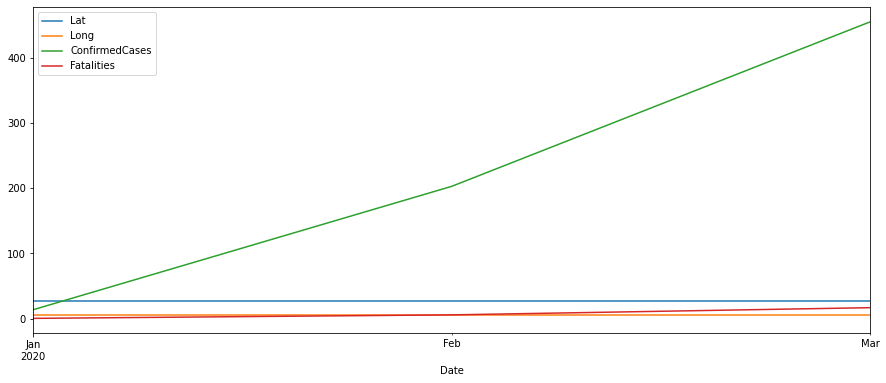

In [29]:
y.plot(figsize=(15, 6))
plt.show()

In [30]:
TrainCov_data.head

<bound method NDFrame.head of            Province/State  ...                    geometry
Date                       ...                            
2020-01-22            NaN  ...   POINT (65.00000 33.00000)
2020-01-23            NaN  ...   POINT (65.00000 33.00000)
2020-01-24            NaN  ...   POINT (65.00000 33.00000)
2020-01-25            NaN  ...   POINT (65.00000 33.00000)
2020-01-26            NaN  ...   POINT (65.00000 33.00000)
...                   ...  ...                         ...
2020-03-14            NaN  ...  POINT (28.28330 -15.41670)
2020-03-15            NaN  ...  POINT (28.28330 -15.41670)
2020-03-16            NaN  ...  POINT (28.28330 -15.41670)
2020-03-17            NaN  ...  POINT (28.28330 -15.41670)
2020-03-18            NaN  ...  POINT (28.28330 -15.41670)

[16188 rows x 7 columns]>

In [31]:
#TrainCov_data.Country/Region=='Afghanistan'].value_counts()
TrainCov_data[TrainCov_data['Country/Region']=='China'].count()

Province/State    1881
Country/Region    1881
Lat               1881
Long              1881
ConfirmedCases    1881
Fatalities        1881
geometry          1881
dtype: int64

In [0]:
Date_df = TrainCov_data.groupby("Date").agg("sum").sort_values(by=['Fatalities'], ascending=False)

In [33]:

Date_df

,Lat,Long,ConfirmedCases,Fatalities
Date,,,,
2020-03-18,7465.7049,1353.5983,214915.0,8733.0
2020-03-17,7465.7049,1353.5983,197145.0,7905.0
2020-03-16,7465.7049,1353.5983,181530.0,7126.0
2020-03-15,7465.7049,1353.5983,167449.0,6440.0
2020-03-14,7465.7049,1353.5983,156097.0,5819.0
2020-03-13,7465.7049,1353.5983,145193.0,5404.0
2020-03-12,7465.7049,1353.5983,128343.0,4720.0
2020-03-11,7465.7049,1353.5983,125865.0,4615.0
2020-03-10,7465.7049,1353.5983,118592.0,4262.0


In [0]:

bycountry=TrainCov_data[TrainCov_data['Country/Region']=='Egypt']
#TrainCov_data['ConfirmedCases'].plot(grid=True)

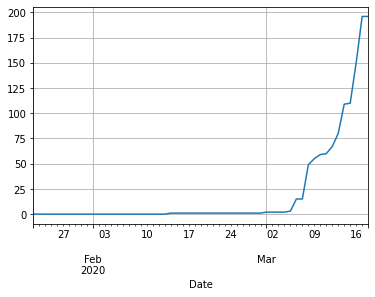

In [35]:
bycountry['ConfirmedCases'].plot(grid=True)

In [42]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
test = pd.read_csv('/content/test.csv')
TrainCov_data.columns



(16188, 4)

In [57]:

for country in TrainCov_data['Country/Region'].unique():
      #print ('training model for country ==>'+country)

      bycountry= TrainCov_data[ TrainCov_data['Country/Region']=='country']

      Testbycountry=test[test['Country/Region']=='country']
      if bycountry['Province/State'].isna().unique()==True:
          Model=Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
          print( bycountry.columns)
          X_train=bycountry[['Province/State', 'Country/Region', 'Lat', 'Long']]
          y = bycountry['ConfirmedCases']
          Model.fit(  bycountry,y)
          print(Model.score())
          predict_x = (np.array(range(len(Testbycountry)))+50).reshape((-1,1))
          #test.loc[(test['Country/Region']==country)and'ConfirmedCases'] = model.predict(predict_x)
      # print(test['ConfirmedCases']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  


In [0]:
test.columns